#Install library

In [ ]:
!pip install livelossplot

#Import

In [ ]:
from livelossplot import PlotLossesKerasTF
from keras.datasets import mnist
%config Completer.use_jedi = False
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

#Data aquisition

In [ ]:
#load MNIST dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


## Scale data

In [ ]:
x_train = x_train/255
x_test  = x_test/255

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Reshape data

In [ ]:
x_train = x_train.reshape((x_train.shape[0],np.prod(x_train.shape[1:])))

x_test  = x_test.reshape( (x_test.shape[0] ,np.prod(x_test.shape[1:])))

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


##Convert data

In [ ]:
# one hot encoding outcome
target_train = to_categorical(y_train)
target_test  = to_categorical(y_test)

# Build network

In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Reshape, BatchNormalization, Conv2D, MaxPool2D, Flatten
from tensorflow.keras import Model

In [ ]:
input_img=Input(shape=(10,))
decoder=Dense(128,activation="relu")(input_img)
decoder=Dense(256,activation="relu")(decoder)
decoder=Dense(512,activation='relu')(decoder)
decoder=Dense(784,activation='relu')(decoder)

In [ ]:
#build decoder
decoder_model = Model(input_img,decoder)

In [ ]:
#compile model
decoder_model.compile(optimizer='adam',loss='mse', metrics=['accuracy'])

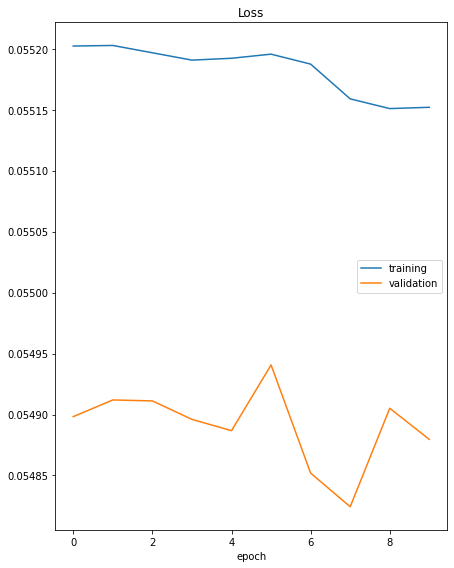

Loss
	training         	 (min:    0.055, max:    0.055, cur:    0.055)
	validation       	 (min:    0.055, max:    0.055, cur:    0.055)
154/154 [==============================] - 5s 36ms/step - loss: 0.0552 - val_loss: 0.0549


In [ ]:
decoder_model.fit(target_train,x_train,
                  epochs=10,
                  batch_size=390,
                  validation_data=(target_test,x_test),
                  callbacks=[PlotLossesKerasTF()])

#Show result

In [ ]:
test_pred = to_categorical(np.arange(10))
test_pred = test_pred + np.random.uniform(0, 0.1, 10)

In [ ]:
test_pred

array([[1.02849038e+00, 4.15082831e-02, 5.91334288e-02, 8.44718594e-02,
        3.43103199e-02, 1.42289127e-02, 7.31490905e-04, 5.90403498e-04,
        2.31418187e-02, 8.50725048e-02],
       [2.84903817e-02, 1.04150828e+00, 5.91334288e-02, 8.44718594e-02,
        3.43103199e-02, 1.42289127e-02, 7.31490905e-04, 5.90403498e-04,
        2.31418187e-02, 8.50725048e-02],
       [2.84903817e-02, 4.15082831e-02, 1.05913343e+00, 8.44718594e-02,
        3.43103199e-02, 1.42289127e-02, 7.31490905e-04, 5.90403498e-04,
        2.31418187e-02, 8.50725048e-02],
       [2.84903817e-02, 4.15082831e-02, 5.91334288e-02, 1.08447186e+00,
        3.43103199e-02, 1.42289127e-02, 7.31490905e-04, 5.90403498e-04,
        2.31418187e-02, 8.50725048e-02],
       [2.84903817e-02, 4.15082831e-02, 5.91334288e-02, 8.44718594e-02,
        1.03431032e+00, 1.42289127e-02, 7.31490905e-04, 5.90403498e-04,
        2.31418187e-02, 8.50725048e-02],
       [2.84903817e-02, 4.15082831e-02, 5.91334288e-02, 8.44718594e-02,
   

In [ ]:
img_pred = decoder_model.predict(test_pred)

In [ ]:
img_pred.shape

(10, 784)

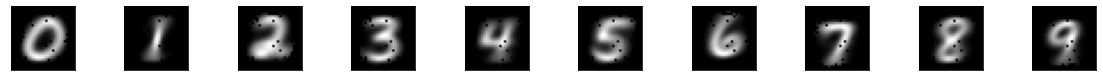

In [ ]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(3,n,i+1)
    plt.imshow(img_pred[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
